 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_data = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_data = whale_data.sort_index()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_data.dtypes
# identifying Null
# YOUR CODE HERE
whale_data.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [5]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
# YOUR CODE HERE
whale_data = whale_data.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_data = pd.read_csv(algo_returns_csv,  index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data = algo_data.sort_index()
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
# YOUR CODE HERE
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
# YOUR CODE HERE
algo_data = algo_data.dropna()
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_data = pd.read_csv(
    sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data = sp500_data.sort_index()
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
sp500_data["Close"] = sp500_data["Close"].str.replace("$","")
sp500_data["Close"] = sp500_data["Close"].astype("float")
sp500_data.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_data = sp500_data.pct_change()
sp500_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
# YOUR CODE HERE
sp500_data.dropna(inplace = True)

In [15]:
# Rename Column
# YOUR CODE HERE
columns = ['S&P 500']
sp500_data.columns = columns
sp500_data.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_data = pd.concat([whale_data, algo_data, sp500_data], axis="columns", join="inner")
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

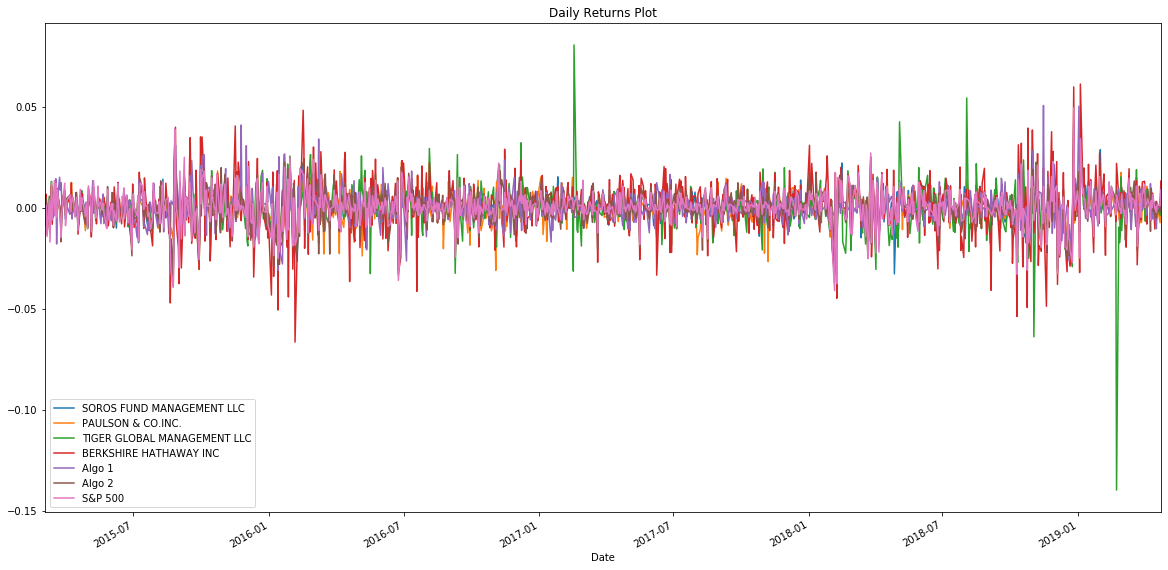

In [17]:
# Plot daily returns
combined_data.plot(figsize=(20, 10), title="Daily Returns Plot")

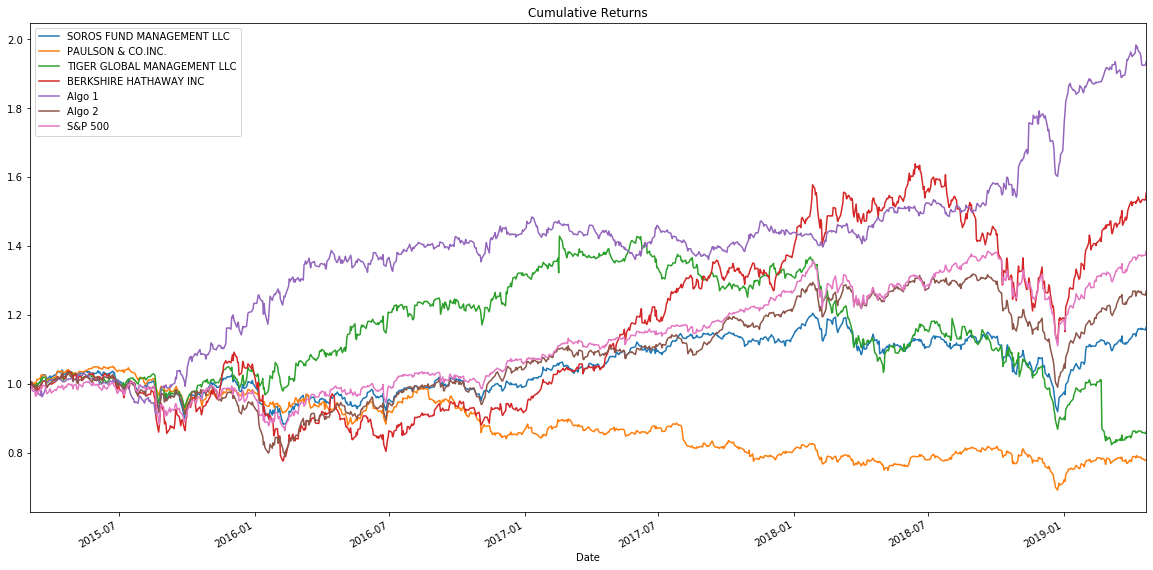

In [18]:
# Plot cumulative returns
cumulative_returns = (1 + combined_data).cumprod()
cumulative_returns.plot(figsize=(20,10), title= "Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

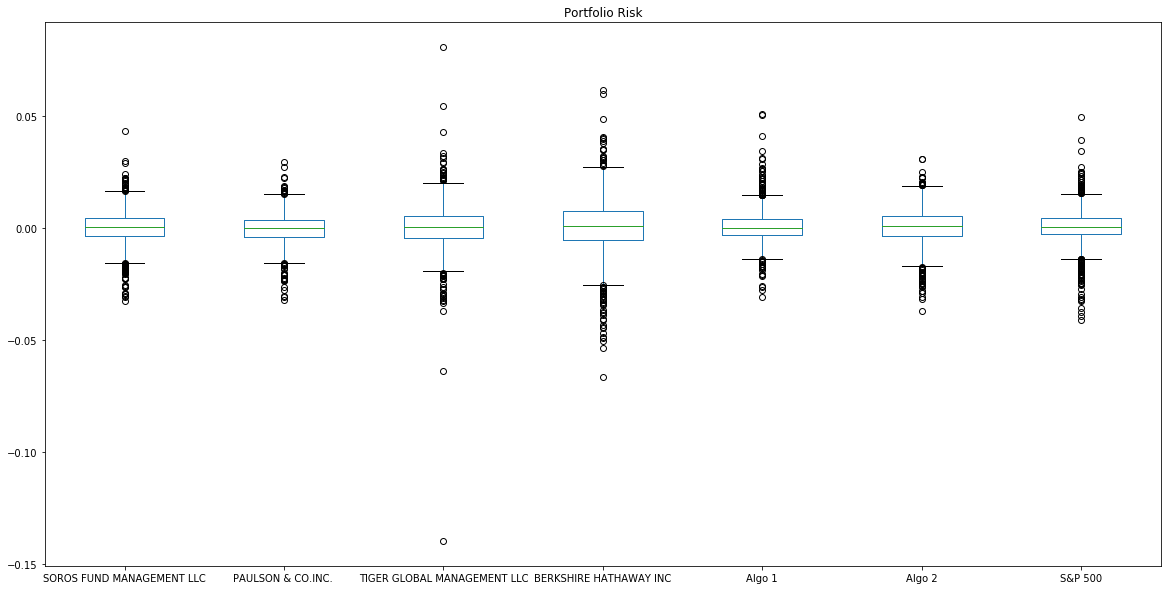

In [19]:
# Box plot to visually show risk
combined_data.plot.box(figsize=(20,10), title= "Portfolio Risk")

# Berkshire Hathaway INC has the largest spead(Risk) and Paulson & Co INC has the smallest spead

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_risk = combined_data.std()
combined_risk

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

# BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC has higher risk than S&P 500

In [21]:
# Determine which portfolios are riskier than the S&P 500
sp500_risk = combined_data["S&P 500"].std()

In [22]:
combined_risk > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [23]:
# Calculate the annualized standard deviation (252 trading days)
volatility = combined_risk * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

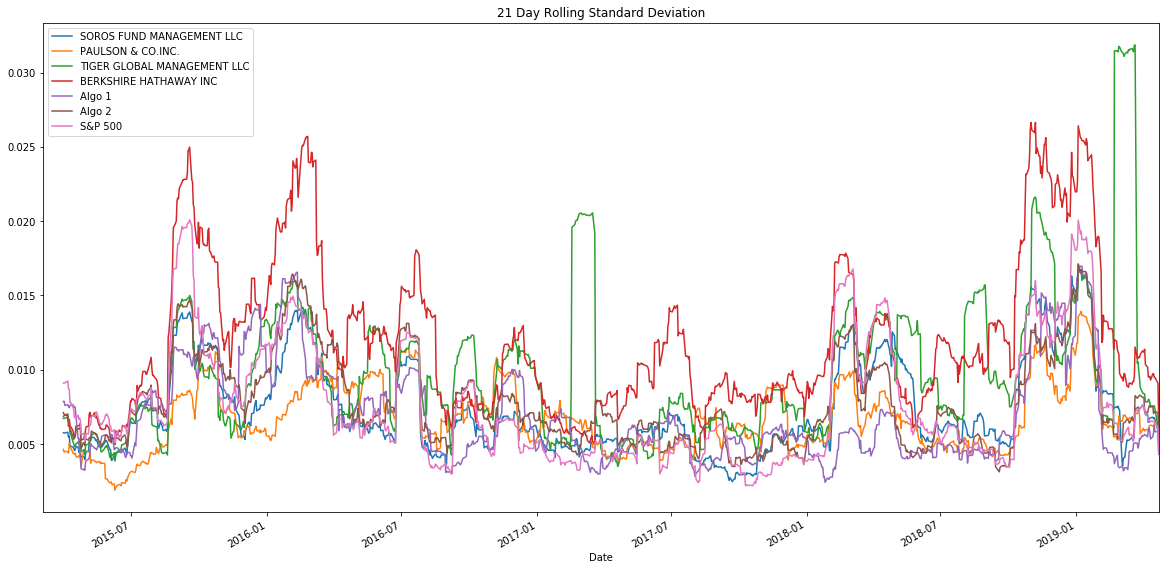

In [24]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_data.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

# Yes risk increases for all the other porfolio as can be seen in the plot.

In [25]:
# Correlation
combined_correlation = combined_data.corr()
combined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


# S&P 500 has the strongest correlation to Algo 2

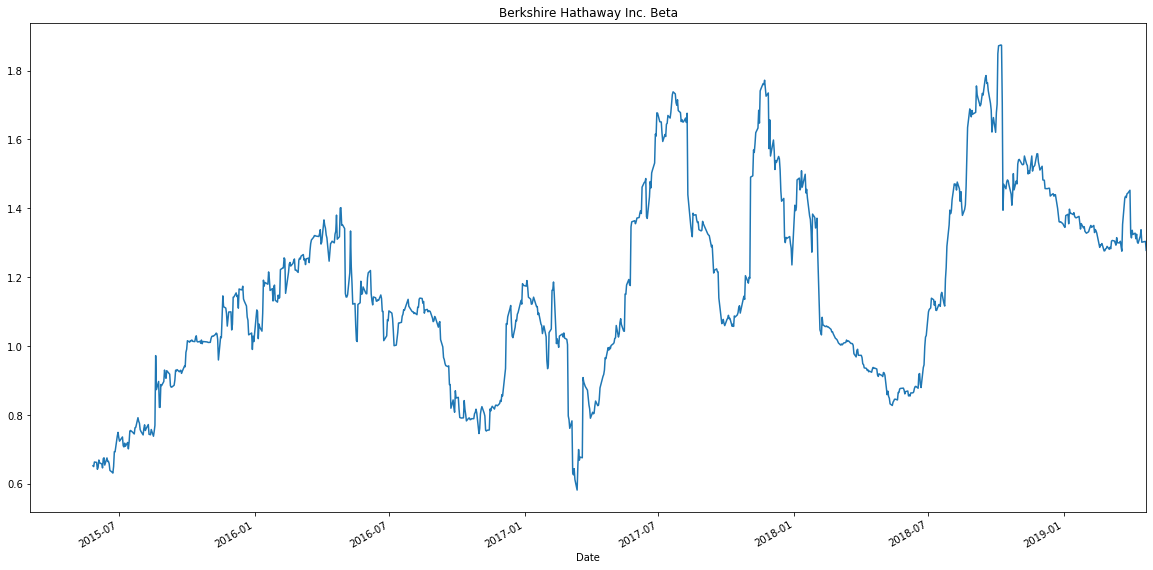

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_data["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_data["S&P 500"])
variance = combined_data["S&P 500"].rolling(window=60).var()
beta = covariance / variance
beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")

# BERKSHIRE HATHAWAY INC is sensative to the moement of S&P 500

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [27]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

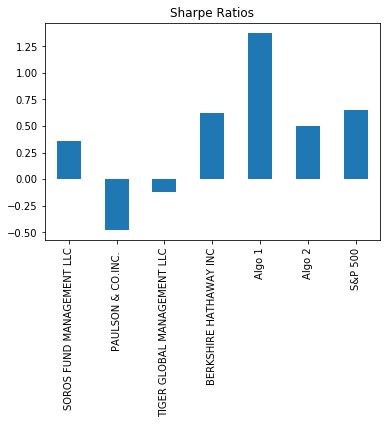

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Read the first stock
google_historical_csv = Path("../Resources/goog_historical.csv")
google_historical = pd.read_csv(google_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_historical = google_historical.sort_index()
google_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Read the second stock
apple_historical_csv = Path("../Resources/aapl_historical.csv")
apple_historical = pd.read_csv(
    apple_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_historical = apple_historical.sort_index()
apple_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [32]:
# Read the third stock
costco_historical_csv = Path("../Resources/cost_historical.csv")
costco_historical = pd.read_csv(
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [33]:
# Concatenate all stocks into a single DataFrame
all_stocks = pd.concat([google_historical, apple_historical, costco_historical], axis="rows", join="inner")
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [34]:
# Reset the index
all_stocks = all_stocks.reset_index()
all_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [35]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
portfolio = all_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
# Drop Nulls
daily_returns = portfolio.pct_change().dropna()
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# YOUR CODE HERE
combined_data["Custom"] = portfolio_returns
combined_data.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [39]:
# Only compare dates where the new, custom portfolio has dates
combined_data.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [40]:
# Risk
combined_data.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

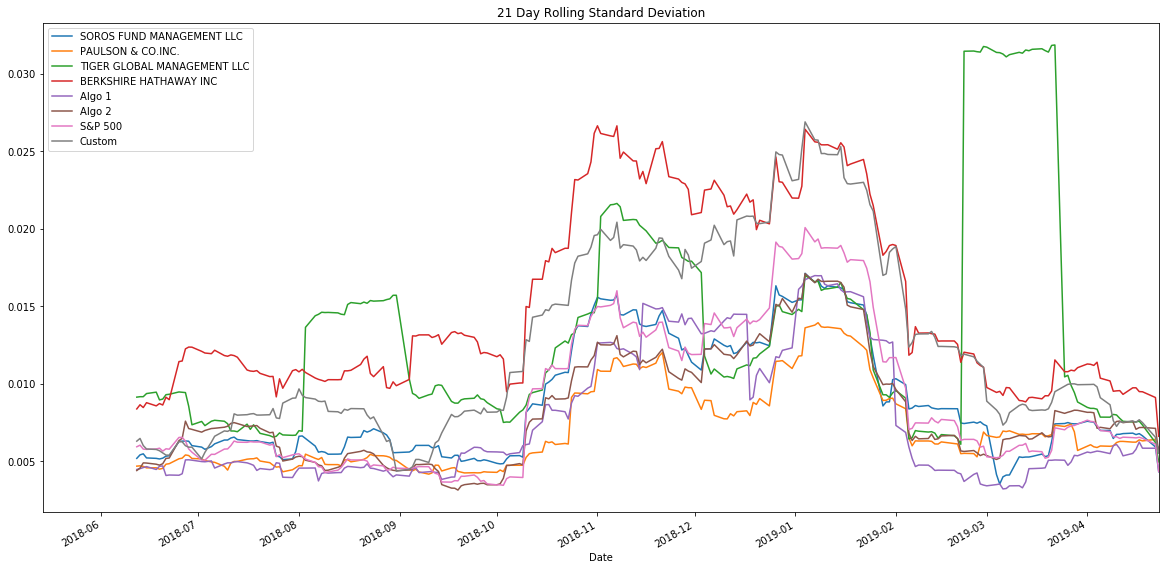

In [41]:
# Rolling
combined_data.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

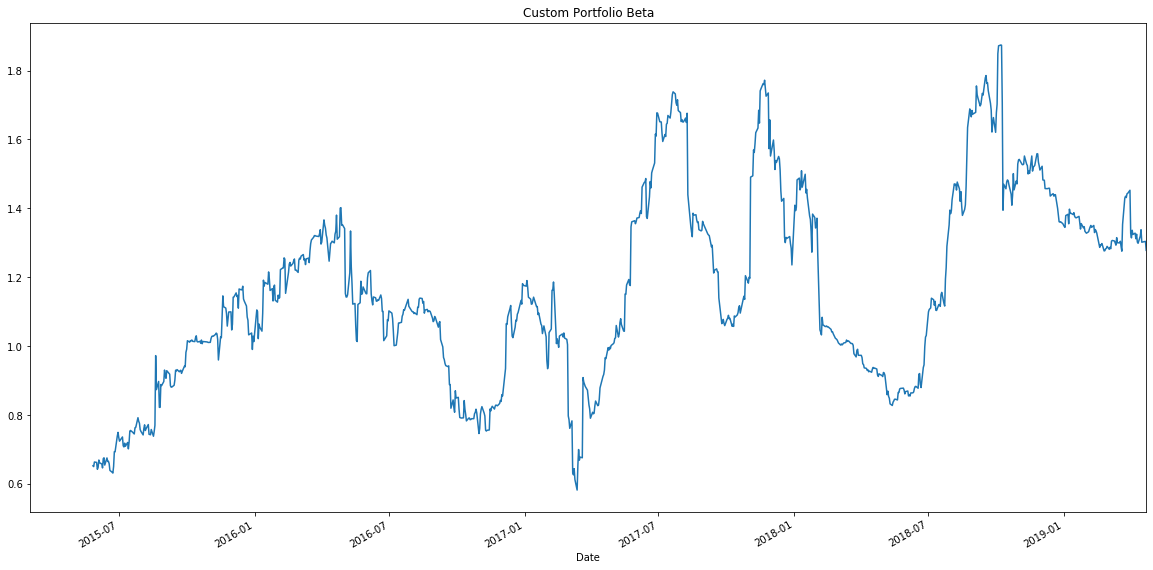

In [42]:
# Beta
Covariance = combined_data["Custom"].rolling(window=60).cov(combined_data["S&P 500"])
Variance = combined_data["S&P 500"].rolling(60).var()
Beta = Covariance / Variance
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

In [43]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

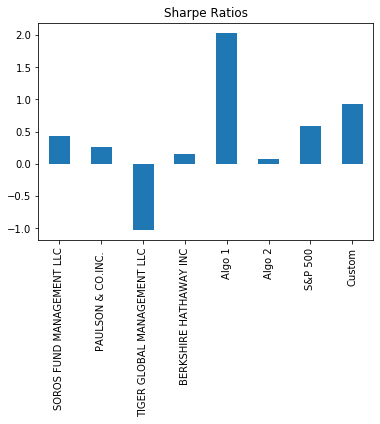

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [45]:
# YOUR CODE HERE
combined_data.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


## After reviewing my portfolio with the market and the whale, it looks to be having a heathly sharp ratio with is close to 1 , sayion my returns are good. Also i can see that my portfolio is market driven as it has a correlation of 0.8 with the market.